In [220]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
# 設定 data_path
dir_data = './data/'

In [221]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [222]:
def cal(data):
    l = list(filter(lambda v: v==v, data))
    ave = float(sum(l))/len(l)
    s1=0
    s2=0
    for i in l:
        s1+=i**2
        s2+=i
    varianve = float(s1)/len(l)-(float(s2)/len(l))**2
    return ave, varianve

In [223]:
#'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY' 這三個欄位的平均數和標準差
data = []
for i in ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']:    
    tmp = pd.DataFrame([{'平均數':cal(list(app_train[i]))[0],'標準差':cal(list(app_train[i]))[1]}], index=[i])
    data.append(tmp)
data = pd.concat(data)
data

,平均數,標準差
AMT_INCOME_TOTAL,168797.919297,5.622720e+10
AMT_CREDIT,599025.999706,1.619983e+11
AMT_ANNUITY,27108.573909,2.100677e+08


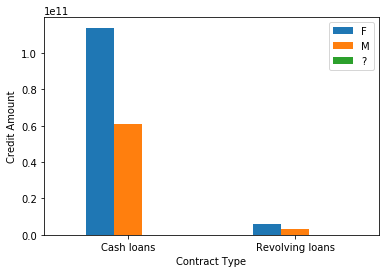

In [219]:
#不同性別　不同付款方式　金錢花費金額（結果：女生消費力高　一次付清比循環借貸多）
import matplotlib.pyplot as plt
df = app_train.groupby(['NAME_CONTRACT_TYPE','CODE_GENDER'])[['AMT_CREDIT']].sum().unstack(fill_value=0)
df.plot(kind='bar',rot=0)
plt.xlabel('Contract Type')
plt.ylabel('Credit Amount')
plt.legend(["F","M","?"],loc=1)